# Определение перспективного тарифа для телеком компании

В этой работе предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов:

### Тариф "Смарт"

   * Ежемесячная плата: 550 рублей
   * Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
   
####  Стоимость услуг сверх тарифного пакета:

   * минута разговора: 3 рубля
   * сообщение: 3 рубля
   * 1 Гб интернет-трафика: 200 рублей

### Тариф "Ультра"

   * Ежемесячная плата: 1950 рублей
   * Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
   
####  Стоимость услуг сверх тарифного пакета:

   * минута разговора: 1 рубль
   * сообщение: 1 рубль
   * 1 Гб интернет-трафика: 150 рублей

# Описание данных

#### Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

#### Таблица calls (информация о звонках):

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

#### Таблица messages (информация о сообщениях):

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

#### Таблица internet (информация об интернет-сессиях):

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

#### Таблица tariffs (информация о тарифах):

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Что предстоит сделать?

##### 1. Открыть датасет, ознакомиться с данными и определить пропущенные значения, и если необходимо, восстановить их.

##### 2. Подготовить данные к исследованию и  посчитать для каждого пользователя по месяцам:

   * колличество сделанных звонков и потраченных минут разговора
   * отправленных сообщений
   * объём израсходованного интернет - трафика
   * выручку с каждого пользователя
    
    
##### 3. Проанализировать данные, а именно:

Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 

##### 4. Проверим гипотезы, а именно:

   * узнаем различается ли средняя выручка пользователей тарифов
   * узнаем различается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов
    
    
##### 5. Общий вывод по проделанной работе    




# Важная заметка

Оператор предупредил нас, что всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Шаг 1. Откроем файлы с данными и изучим общую информацию

In [1]:
import pandas as pd 
import numpy as np
import warnings                   
warnings.filterwarnings('ignore') 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st

In [2]:
df_calls = pd.read_csv('***')
df_internet = pd.read_csv('***')
df_messages = pd.read_csv('***')
df_tariffs = pd.read_csv('***')
df_users = pd.read_csv('***')

 Для начала изучим информацию о проделанных звонках

In [3]:
df_calls.head(25)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [5]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


#### После ознакомления с таблицей о совершённых звонках можно сделать вывод, что: 

1. Убрать нулевые значения, которые являются пропущенными звонками. Как мы это узнали? Если было бы зафиксировано соединение, то оператор зачёт бы этот звонок, следовательно это пропущенный звонок и эти значения никакой информативности для нашего исследования не несут. 
2. Округлить до целых значений длительность звонка. Как мы помним, что оператор предупредил, что округляет все до целых значений, следовательно, для дальнейшего исследования это сделаем и мы, т.к. нас не интересует сколько проговорил на самом деле человек, а интересует сколько минут списал оператор.
3. Преобразуем столбец call_date к формату datatime для дальнейшей работы с ним

#### Приступим к обработке

In [6]:
df_calls = df_calls.loc[df_calls['duration'] != 0]

In [7]:
df_calls.duration = np.ceil(df_calls.duration).astype(int)

In [8]:
df_calls.call_date = pd.to_datetime(df_calls.call_date, format='%Y-%m-%dT')

In [9]:
df_calls.duration.describe()

count    162994.000000
mean          8.897880
std           5.353761
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          38.000000
Name: duration, dtype: float64

In [10]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         162994 non-null  object        
 1   call_date  162994 non-null  datetime64[ns]
 2   duration   162994 non-null  int32         
 3   user_id    162994 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.6+ MB


In [11]:
df_calls.duplicated().sum()

0

Отлично. Избавились от ненужных значений, округлили и теперь приступим к следующему файлу с данными

In [12]:
df_internet.head(25)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [13]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [14]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


#### После ознакомления с таблицей о потраченном интернет - трафике можно сделать вывод, что: 

1. Убрать нулевые значения, т.к. скорее всего в этот день человек не пользовался интернетом, но даже если и там что-то было, то возможности восстановить у нас нет и нулевые значения так же не несут никакой информативности, а только занимают место
2. Так же округлим до целых значений.
3. Индексы сместились в столбец. Сейчас трогать его не будем. Уберём в дальнейшем при построении свобдной таблицы.
4. Так же преобразуем столбец session_date к формату datetime для дальнейшей работы с ним

#### Приступим к обработке

In [15]:
print('Колличество нулевых значений составляет {:.2%}'\
      .format(df_internet[df_internet['mb_used'] == 0]['mb_used']\
              .shape[0] / len(df_internet)))


Колличество нулевых значений составляет 13.12%


13% пользователей кто не пользовался интернетом. Достаточно много от нашей выборки. Это ~ 20 тыс. строк. Вполне вероятно, что эти люди:
 
 1. Либо только подключились
 2. Либо отключились от услуги, но абонентская плата была снята
 
Что в первом, что во втором случае они нам не интересны, то убёрем нулевые значения и оставим только тех, кто хоть как-то пользовался интернетом.

In [16]:
df_internet = df_internet.loc[df_internet['mb_used'] != 0]

In [17]:
df_internet.mb_used = np.ceil(df_internet.mb_used).astype(int)

In [18]:
df_internet.session_date = pd.to_datetime(df_internet.session_date, format='%Y-%m-%dT')

In [19]:
df_internet.mb_used.describe()

count    129798.000000
mean        426.581758
std         255.596114
min           1.000000
25%         228.000000
50%         401.000000
75%         593.000000
max        1725.000000
Name: mb_used, dtype: float64

In [20]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    129798 non-null  int64         
 1   id            129798 non-null  object        
 2   mb_used       129798 non-null  int32         
 3   session_date  129798 non-null  datetime64[ns]
 4   user_id       129798 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 5.4+ MB


In [21]:
df_internet.duplicated().sum()

0

Отлично. Избавились от ненужных значений, округлили и теперь приступим к следующему файлу с данными

In [22]:
df_messages.head(25)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [23]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Тут просто приведём столбец message_date к формату datetime

In [24]:
df_messages.message_date = pd.to_datetime(df_messages.message_date, format='%Y-%m-%dT')

In [25]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [26]:
df_messages.duplicated().sum()

0

Отлично. переходим к следущему столбцу

In [27]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [28]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


 Тут всё ок. Ознакомимся с последним датафреймом

In [29]:
df_users.head(25)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [30]:
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [31]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [32]:
df_users.nunique()

user_id       500
age            58
churn_date     33
city           76
first_name    246
last_name     419
reg_date      270
tariff          2
dtype: int64

In [33]:
df_users.duplicated().sum()

0

##### После ознакомления с таблицей о пользователях можно сделать вывод, что: 

1. Пропущенные значения говорят нам о том, что человек всё ещё пользуется данным тарифом и вопрос об обработке сразу же отпадает.
2. Дубликатов нет.


###  Вывод по первому шагу

Итак, можно сделать вывод после того, как ознакомились с таблицей о том, что:

1. Нулевые значения не несли никакой информации и мы убрали их из нашей выборки
2. Округлили до целочисленных значений, чтобы понимать как данные числа учитываются у оператора
3. Ознакомились с данными
4. Преобразовали данные к формату с которым будем дальше работать

##### Приступим к следующему шагу и подготовим наши таблицы для дальнеших исследований.

# Шаг 2. Подготовим данные к исследованию

 Итак, для начала добавим для каждого пользователя его активность по месяцам. Начнём с таблицы о звонках

In [34]:
df_calls['month'] = df_calls.call_date.dt.month_name()

In [35]:
df_calls.head()

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3,1000,June
3,1000_3,2018-09-21,14,1000,September
4,1000_4,2018-12-15,6,1000,December
7,1000_7,2018-08-22,19,1000,August
8,1000_8,2018-09-15,19,1000,September


Теперь сгруппируем пользователей по месяцам и считаем сколько минут он проговорил в каждом месяце

In [36]:
df_calls = df_calls.groupby(['user_id', 'month'], as_index=False)\
    .agg({'duration':'sum'})\
    .rename(columns={'duration':'pass_minutes'})

In [37]:
df_calls.head(25)

,user_id,month,pass_minutes
0,1000,August,408
1,1000,December,333
2,1000,July,340
3,1000,June,172
4,1000,May,159
5,1000,November,338
6,1000,October,350
7,1000,September,466
8,1001,December,414
9,1001,November,430


 Теперь мы знаем сколько каждый пользователь проговорил минут за каждый месяц. Теперь проделаем такие же действия c интернет - трафиком

In [38]:
df_internet['month'] = df_internet.session_date.dt.month_name()

In [39]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,November
1,1,1000_1,1053,2018-09-07,1000,September
2,2,1000_2,1198,2018-06-25,1000,June
3,3,1000_3,551,2018-08-22,1000,August
4,4,1000_4,303,2018-09-24,1000,September


In [40]:
df_internet = df_internet.groupby(['user_id', 'month'], as_index=False).agg({'mb_used':'sum'})

In [41]:
df_internet.head(25)

,user_id,month,mb_used
0,1000,August,14070
1,1000,December,9827
2,1000,July,14016
3,1000,June,23257
4,1000,May,2256
5,1000,November,14768
6,1000,October,14717
7,1000,September,14581
8,1001,December,14053
9,1001,November,18452


Отлично. Для удобства добавим столбец с гигабайтами. Насколько мы знаем, что гигабайт равен 1024 мб, то и будем делить на это число. Так же округлим вверх до ГБ, т.к. оператор в дальнейшем списывает средства за потраченные ГБ, а не МБ

In [42]:
df_internet['gb_used'] = df_internet.mb_used / 1024
df_internet.gb_used = np.ceil(df_internet.gb_used)
df_internet.head(5)

,user_id,month,mb_used,gb_used
0,1000,August,14070,14.0
1,1000,December,9827,10.0
2,1000,July,14016,14.0
3,1000,June,23257,23.0
4,1000,May,2256,3.0


 Теперь мы знаем сколько каждый пользователь потратил ГБ за каждый месяц. Теперь проделаем такие же действия c сообщениями

In [43]:
df_messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [44]:
df_messages['month'] = df_messages.message_date.dt.month_name()

In [45]:
df_messages = df_messages.groupby(['user_id', 'month'], as_index=False)\
    .agg({'id':'count'})\
    .rename(columns={'id':'send_message'})

In [46]:
df_messages.head()

,user_id,month,send_message
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


 Ну вот, теперь мы знаем сколько сообщений каждый пользователь отправил за каждый месяц. Теперь осталось подготовить последнюю нашу таблицу и можно приступать к объединению

In [47]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


 Видим, что трафик включен в тариф в МБ, а доп. трафик указан в ГБ. Добавим к нашей таблице столбец с включёнными ГБ. Так же для дальнейшего объединения переименуем столбец tariff_name в tariff

In [48]:
df_tariffs['gb_included'] = df_tariffs.mb_per_month_included / 1024
df_tariffs.gb_included = df_tariffs.gb_included.round(2)

In [49]:
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})

In [50]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,gb_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


 Отлично. Теперь Приступим к объединению столбцов

In [51]:
df = (df_internet
            .merge(df_messages, on =['user_id', 'month'], how='outer')
            .merge(df_calls, on =['user_id', 'month'], how='outer')
            .merge(df_users, on =['user_id'], how='left')
            .merge(df_tariffs, on =['tariff'],how='left')
           )

In [52]:
df.head(5)

,user_id,month,mb_used,gb_used,send_message,pass_minutes,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included
0,1000,August,14070.0,14.0,81.0,408.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
1,1000,December,9827.0,10.0,70.0,333.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
2,1000,July,14016.0,14.0,75.0,340.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
3,1000,June,23257.0,23.0,60.0,172.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
4,1000,May,2256.0,3.0,22.0,159.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0


 Ну вот. Теперь у нас есть таблица с пользователями, где указано сколько минут, интернет-трафика и сообщений он израсходовал за каждый месяц в 2018 году, а так же что у него за тариф и какие у него условия. Посмотрим теперь нет ли у нас где-то ошибок или пропущенных значений.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   object 
 2   mb_used                3201 non-null   float64
 3   gb_used                3201 non-null   float64
 4   send_message           2717 non-null   float64
 5   pass_minutes           3168 non-null   float64
 6   age                    3214 non-null   int64  
 7   churn_date             187 non-null    object 
 8   city                   3214 non-null   object 
 9   first_name             3214 non-null   object 
 10  last_name              3214 non-null   object 
 11  reg_date               3214 non-null   object 
 12  tariff                 3214 non-null   object 
 13  messages_included      3214 non-null   int64  
 14  mb_per_month_included  3214 non-null   int64  
 15  minu

In [54]:
df.isnull().sum()

user_id                     0
month                       0
mb_used                    13
gb_used                    13
send_message              497
pass_minutes               46
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
gb_included                 0
dtype: int64

In [55]:
df.duplicated().sum()

0

churn_date мы убирать не будем, т.к. помним, что эти значения говорят нам о том, что люди всё ещё пользуются нашими услугами. Остались большие пропуски в столбце send_message. Ну тут вполне логично, что смс сейчас непопулярны и ими редко кто пользуется, так что можно заменить их на нулевые значения. Так же поступим с людьми, кто не пользовался интернетом и теми, кто не звонил.

In [56]:
df.send_message = df.send_message.fillna(0)
df.mb_used = df.mb_used.fillna(0)
df.gb_used = df.gb_used.fillna(0)
df.pass_minutes = df.pass_minutes.fillna(0)

In [57]:
df.isnull().sum()

user_id                     0
month                       0
mb_used                     0
gb_used                     0
send_message                0
pass_minutes                0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
gb_included                 0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   object 
 2   mb_used                3214 non-null   float64
 3   gb_used                3214 non-null   float64
 4   send_message           3214 non-null   float64
 5   pass_minutes           3214 non-null   float64
 6   age                    3214 non-null   int64  
 7   churn_date             187 non-null    object 
 8   city                   3214 non-null   object 
 9   first_name             3214 non-null   object 
 10  last_name              3214 non-null   object 
 11  reg_date               3214 non-null   object 
 12  tariff                 3214 non-null   object 
 13  messages_included      3214 non-null   int64  
 14  mb_per_month_included  3214 non-null   int64  
 15  minu

In [59]:
df.head()

,user_id,month,mb_used,gb_used,send_message,pass_minutes,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included
0,1000,August,14070.0,14.0,81.0,408.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
1,1000,December,9827.0,10.0,70.0,333.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
2,1000,July,14016.0,14.0,75.0,340.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
3,1000,June,23257.0,23.0,60.0,172.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
4,1000,May,2256.0,3.0,22.0,159.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0


Ну вот теперь мы подготовили нашу таблицу для дальнейших исследований и теперь рассчитаем помесячную выручку с каждого пользователя. Для этого узнаем был ли перерасход тарифа у каждого пользователя. Для этого вычтем то, что было использовано из того, что было включено в тариф и умножим на столбцы с доп. услугами. На выходе получим отрицательные и положительные значения. Отрицательные значения приравняем к 0, т.к. этот пользователь полностью не израсходовал тариф и после прибавим сумму тарифа к оставшимся значениям и получим суммарную месячную выручку с каждого пользователя.

In [60]:
df['cost_gb'] = (df['gb_used'] - df['gb_included']) * df['rub_per_gb']
df['cost_minutes'] = (df['pass_minutes'] - df['minutes_included']) * df['rub_per_minute']
df['cost_messages'] = (df['send_message'] - df['messages_included']) * df['rub_per_message']

In [61]:
df.loc[df['cost_gb'] < 0, 'cost_gb'] = 0
df.loc[df['cost_minutes'] < 0, 'cost_minutes'] = 0
df.loc[df['cost_messages'] < 0, 'cost_messages'] = 0

In [62]:
df['total_price'] = df['cost_gb'] + df['cost_minutes'] + df['cost_messages'] + df['rub_monthly_fee']

Удалим ненужные нам столбцы.

In [63]:
df.drop(['cost_gb', 'cost_minutes', 'cost_messages'], axis=1, inplace=True) 

In [64]:
df.head(5)

,user_id,month,mb_used,gb_used,send_message,pass_minutes,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,total_price
0,1000,August,14070.0,14.0,81.0,408.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,1000,December,9827.0,10.0,70.0,333.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,1000,July,14016.0,14.0,75.0,340.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,1000,June,23257.0,23.0,60.0,172.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,1000,May,2256.0,3.0,22.0,159.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0


## Вывод 

##### Подготовили данные к исследованию и посчитали для каждого пользователя по месяцам:

1. колличество сделанных звонков и потраченных минут разговора
2. отправленных сообщений
3. объём израсходованного интернет - трафика
4. выручку с каждого пользователя

##### Теперь приступим к следующему нашему шагу и проанализируем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

## Шаг 3. Анализируем наши данные

Для начала отберём наших пользователей по тарифам.

In [65]:
df_ultra = df.query('tariff == "ultra"')
df_smart = df.query('tariff == "smart"')

Теперь посмотрим сколько в среднем наши пользователи тратят минут ежемесячно, но для начала рассчитаем среднее ддя каждого тарифа и посмотрим как распределены значения относительно среднего в нашей выборке.

In [66]:
df.groupby('tariff').agg({'pass_minutes':['median','mean','var','std']})

pass_minutes                                       
             median        mean            var         std
tariff                                                    
smart         422.0  417.934948   36219.315784  190.313730
ultra         518.0  526.623350  100873.633397  317.606098

Видим, что среднее не сильно отличается от медианного значения у обоих тарифов, но как можем заметить, что у обеих тарифов большое стандартное отклонение, но больше всего у "ультра",а это значит вариабельность минут очень высокая. 
Теперь построим график и посмотрим сколько в среднем каждый месяц тратят минут наши пользователи. Синим цветом обозначим колличество минут, которые включены в тариф, а красным сколько в среднем тратят пользователи минут. Бордовый говорит о том, что значения лежат в пределах предложенного.

In [67]:
def graph_of_spending (df, how_gr_col1, gr_col2_pass, gr_col3_include, title, x1, x2, y):
    month_order = ['January', 'February', 'March', 
             'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 
               'November', 'December']
    df[how_gr_col1] = pd.Categorical(df[how_gr_col1], categories=month_order, ordered=True)
    df_pass = df.groupby(how_gr_col1, as_index=False).agg({gr_col2_pass:'mean'})
    df_include = df.groupby(how_gr_col1, as_index=False).agg({gr_col3_include:'mean'})
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(x=how_gr_col1, y=gr_col3_include, data=df_include, ax=ax, color='b')
    ax2 = ax.twiny()
    sns.barplot(x=how_gr_col1, y=gr_col2_pass, data=df_pass, ax=ax2, color='r', alpha=0.6)
    ax2.set_title(title)
    ax2.set_xlabel(x2)
    ax.set_xlabel(x1)
    ax.set_ylabel(y)


In [68]:
def hist_of_spending(df, column, bins, xl, yl, title):
    df[column].plot(kind='hist', bins=bins)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(title)

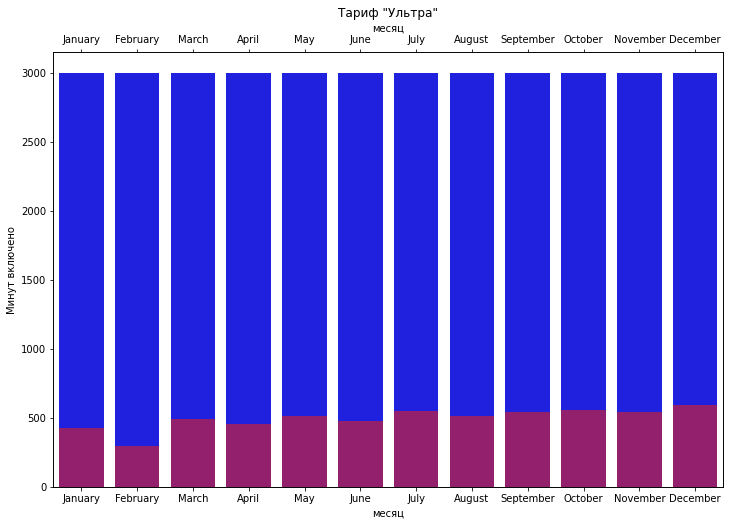

In [69]:
graph_of_spending(df_ultra, 'month', 'pass_minutes', 'minutes_included', 'Тариф "Ультра"', 'месяц', 'месяц', 'Минут включено')

Как видим, что в среднем пользователи не тратят больше 600 минут в месяц. Теперь посмотрим как наши значения распределены относительно среднего.

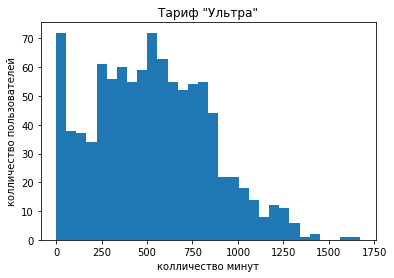

In [70]:
hist_of_spending(df_ultra, 'pass_minutes', 30, 'колличество минут', 'колличество пользователей', 'Тариф "Ультра"')

Как видим, что большинство значений лежат вокруг среднего в пределах от 100 до 800 минут, а так же есть большие выбросы. Какой можно сделать вывод? Пользователи тарифа "Ультра" наиболее вариативно использют свой тариф, но тем не менее этих минут им более чем достаточно.
Теперь посмотрим на тариф "Смарт".

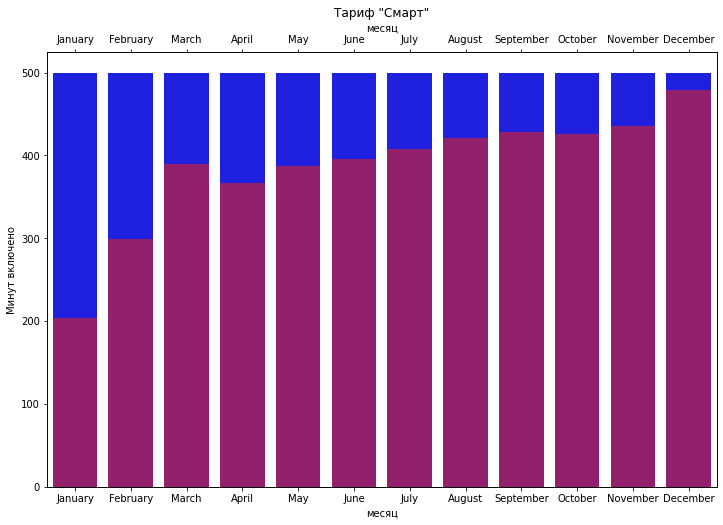

In [71]:
graph_of_spending(df_smart, 'month', 'pass_minutes', 'minutes_included', 'Тариф "Смарт"', 'месяц', 'месяц', 'Минут включено')

Здесь можно заметить, что в среднем пользователи тратят ежемесячно практически весь лимит. Теперь посмотрим как распределены наши значения.

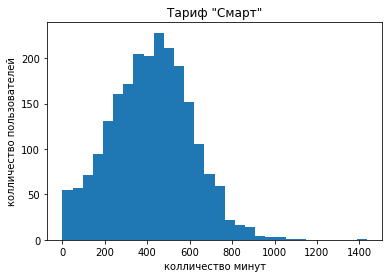

In [72]:
hist_of_spending(df_smart, 'pass_minutes', 30, 'колличество минут', 'колличество пользователей', 'Тариф "Смарт"')

В основном, большинство значений распределены нормально и большинство значений лежит вокруг среднего. Так же можем обратить внимание, что на графике видны выбросы.

Теперь посмотрим на интернет - трафик и узнаем сколько в среднем наши пользователи тратят трафика ежемесячно, но для начала рассчитаем среднее ддя каждого тарифа и посмотрим как распределены значения относительно среднего в нашей выборке.

In [73]:
df.groupby('tariff').agg({'gb_used':['median','mean','var','std']})

gb_used                                
        median       mean        var       std
tariff                                        
smart     17.0  16.359354  33.160304  5.758498
ultra     19.0  19.525888  97.334949  9.865848

Видим, что среднее не сильно отличается от медианного значения у обоих тарифов. Я бы сказал, что даже одинаково, но сразу бросается в глаза, что медианное значение у тарифа "смарт" больше включённого трафика. Так же заметим, что у тарифа "Ультра" большой показатель стандартного отклонения, что говорит нам о том, что значения очень вариативны.
Теперь построим график и посмотрим сколько в среднем каждый месяц тратят трафика наши пользователи. Синим цветом обозначим колличество минут, которые включены в тариф, а красным сколько в среднем тратят пользователи минут.

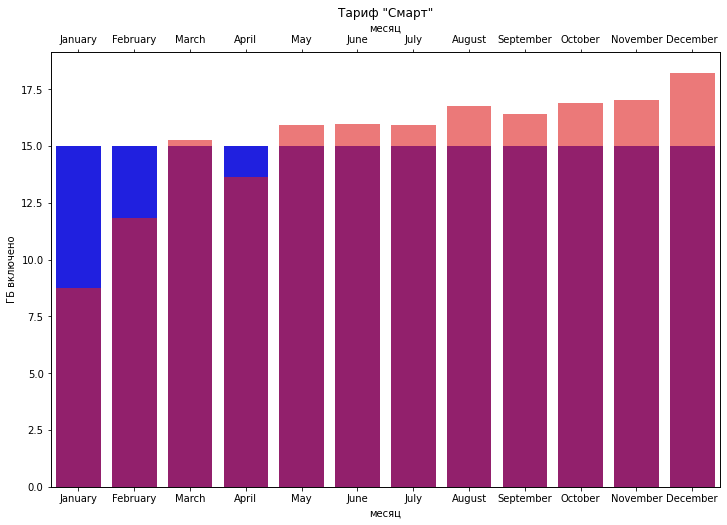

In [74]:
graph_of_spending(df_smart, 'month', 'gb_used', 'gb_included', 'Тариф "Смарт"', 'месяц', 'месяц', 'ГБ включено')

Как видим, что практически каждый месяц в среднем люди докупают дополнительные гигабайты. Теперь посмотрим как распределены наши значения.

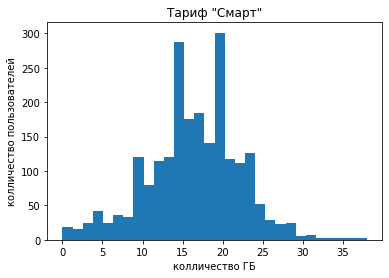

In [75]:
hist_of_spending(df_smart, 'gb_used', 30, 'колличество ГБ', 'колличество пользователей', 'Тариф "Смарт"')

Как видим, что большинство значений лежит больше предложенного трафика, что говорит нам о том, что пользователям данного тарифа явно не хватает предложенного трафика.
Теперь посмотрим на тариф "Ультра".

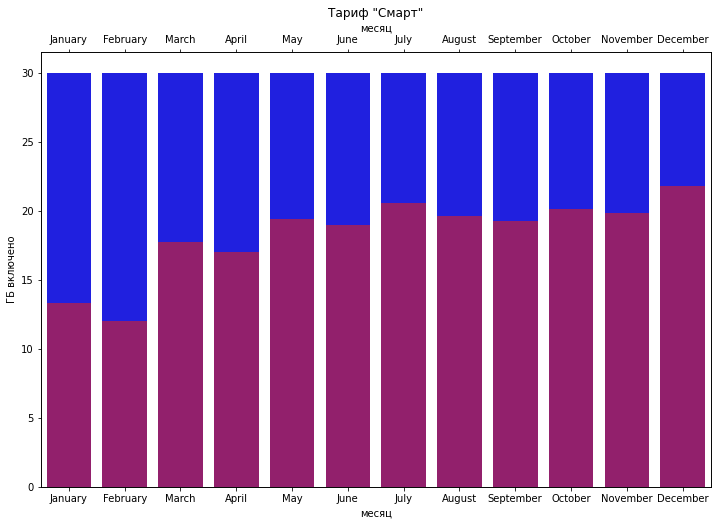

In [76]:
graph_of_spending(df_ultra, 'month', 'gb_used', 'gb_included', 'Тариф "Смарт"', 'месяц', 'месяц', 'ГБ включено')

Как видим, что пользователи в среднем используют чуть больше половины предложенного им трафика, т.е. данного трафика им хватает с головой. Теперь посмотрим на их распределения.

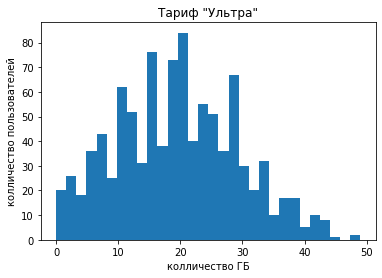

In [77]:
hist_of_spending(df_ultra, 'gb_used', 30, 'колличество ГБ', 'колличество пользователей', 'Тариф "Ультра"')

Видим, что большинство значений лежит в пределах предложенного нам интернет - трафика и лишь небольшие значения, когда люди докупали доп. услугу.

Теперь посмотрим на сообщения и узнаем сколько в среднем наши пользователи тратят смс ежемесячно, но для начала рассчитаем среднее ддя каждого тарифа и посмотрим как распределены значения относительно среднего в нашей выборке.

In [78]:
df.groupby('tariff').agg({'send_message':['median','mean','var','std']})

send_message                                   
             median       mean          var        std
tariff                                                
smart          28.0  33.384029   796.812958  28.227876
ultra          38.0  49.363452  2285.266143  47.804457

Очень и очень мало. 

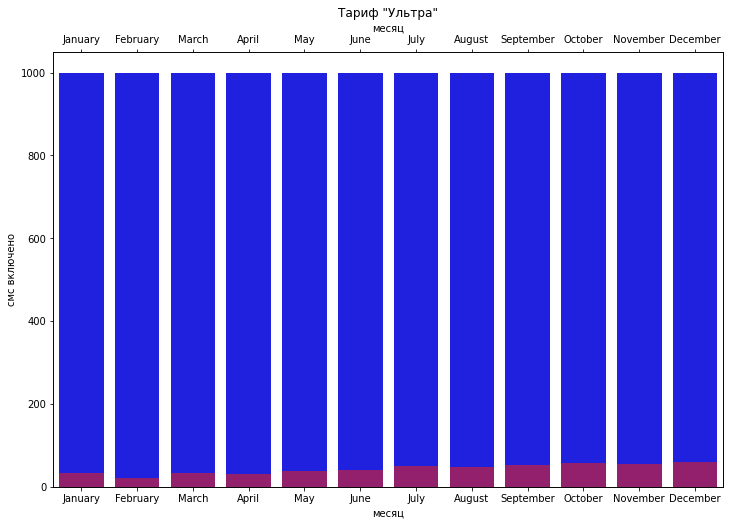

In [79]:
graph_of_spending(df_ultra, 'month', 'send_message', 'messages_included', 'Тариф "Ультра"', 'месяц', 'месяц', 'смс включено')

Как видим, что практически смс сообщениями не пользуются. Теперь посмотрим на их распределения.

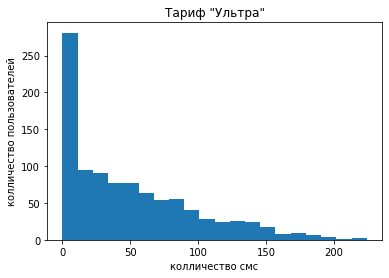

In [80]:
hist_of_spending(df_ultra, 'send_message', 20, 'колличество смс', 'колличество пользователей', 'Тариф "Ультра"')

Практически все значения лежат возле нуля, что говорит о том, что смс не очень популярны. С другой стороны неудивительно, ведь сейчас хорошая альтернатива смс это мессенджеры. Теперь посмотрим на тариф "Смарт".

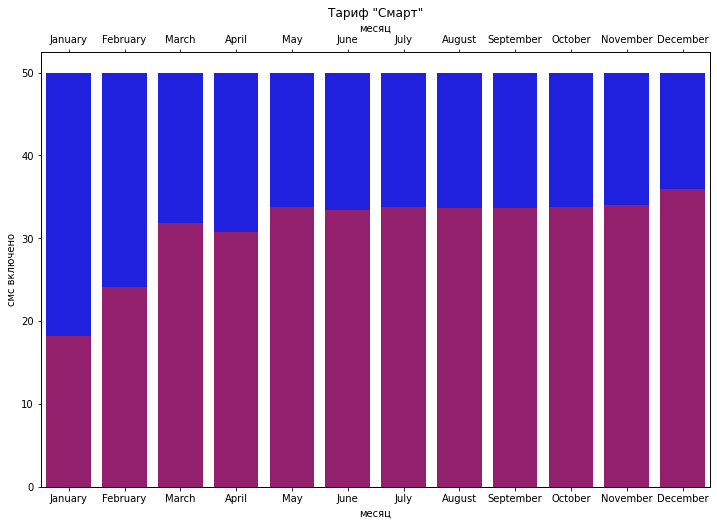

In [81]:
graph_of_spending(df_smart, 'month', 'send_message', 'messages_included', 'Тариф "Смарт"', 'месяц', 'месяц', 'смс включено')

Как видим, что включено в тариф всего 50 смс, а использованы они чуть больше чем на половину ежемесячно, что говорит о том, что это более оптимальное предложения для такой непопулярной услуги. Теперь посмотрим как они распределены.

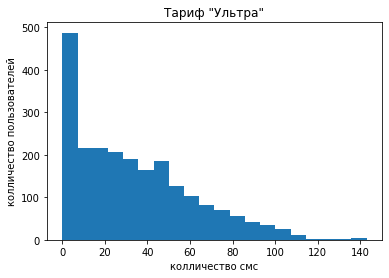

In [82]:
hist_of_spending(df_smart, 'send_message', 20, 'колличество смс', 'колличество пользователей', 'Тариф "Ультра"')

Так же как и в другом тарифе большинство значений лежат в районе 0.

Глянем на среднуюю выручку по месяцам.

In [83]:
df.groupby('tariff').agg({'total_price':['median','mean','sum', 'count']})

total_price                             
            median        mean        sum count
tariff                                         
smart       1038.0  1294.63930  2885751.0  2229
ultra       1950.0  2071.06599  2040000.0   985

<AxesSubplot:ylabel='total_price'>

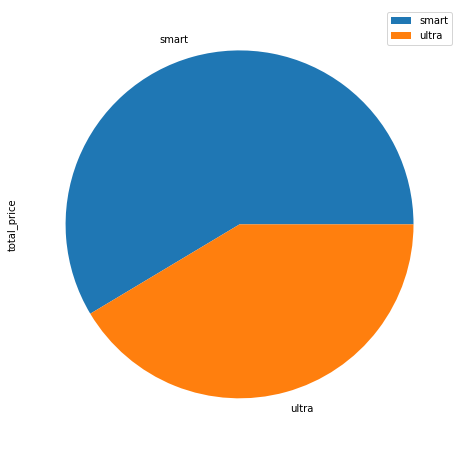

In [84]:
df.groupby('tariff').agg({'total_price':'sum'}).plot.pie(y='total_price', figsize=(10, 8))

Видим, что на тарифе "Смарт" люди переплачивают практически в 2 раза. Посмотрим по месяцам, а так же, что тариф "Смарт" принёс выручки ~ на треть больше, чем тариф "Ультра", но так же можно заметить, что людей с тарифом "Смарт" в 2 раза больше. Поэтому показателем для нас будет сколько в среднем принёс один человек и тогда картина меняется и выходит, что тариф "Ультра" приносит куда больше валовой выручки, чем тариф "Смарт". Теперь посмотрим сколько в среднем люди тратят ежемесячно на тарифе "Смарт".

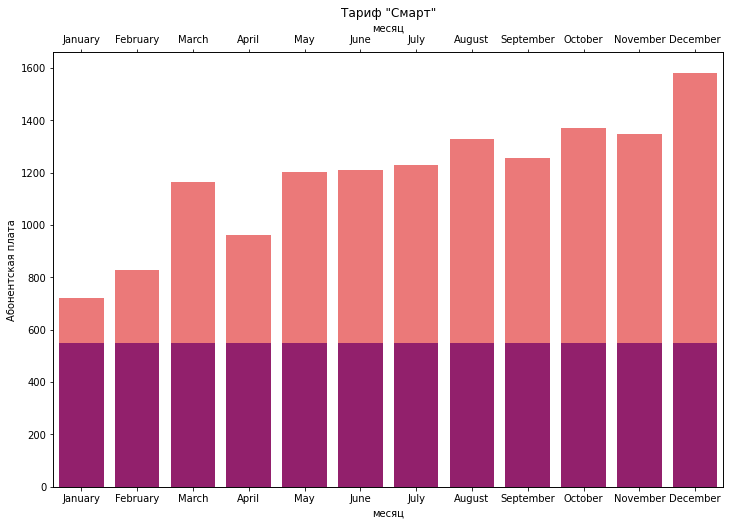

In [85]:
graph_of_spending(df_smart, 'month', 'total_price', 'rub_monthly_fee', 'Тариф "Смарт"', 'месяц', 'месяц', 'Абонентская плата')

Так и есть. В среднем пользователи тарифа "Смарт" докупают дополнительные услуги ежемесячно. 

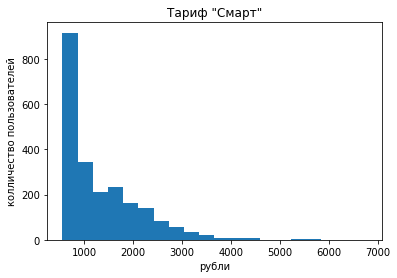

In [86]:
hist_of_spending(df_smart, 'total_price', 20, 'рубли', 'колличество пользователей', 'Тариф "Смарт"')

Как мы видим, что большинство значений лежит в пределах от 550 рублей до 800 рублей, что говорит о том, что большинство людей либо платят абонентскую плату, либо переплачивают, но в пределах 300 руб, что равняется практически абонентской плате. Посмотрим на тариф "Ультра".

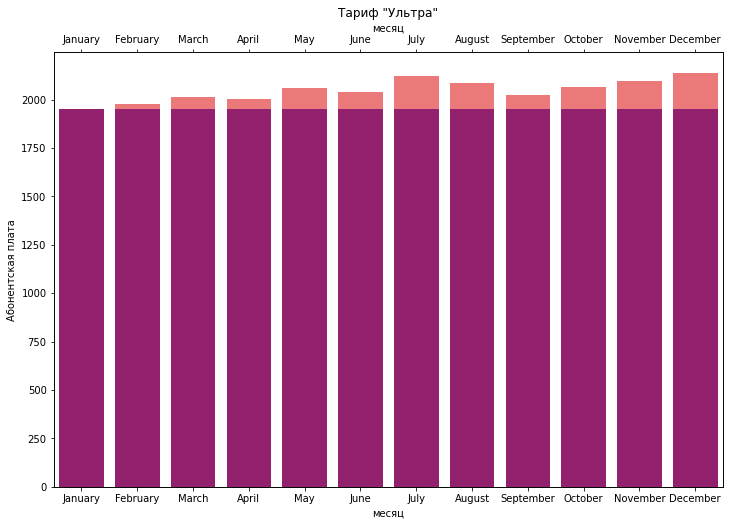

In [87]:
graph_of_spending(df_ultra, 'month', 'total_price', 'rub_monthly_fee', 'Тариф "Ультра"', 'месяц', 'месяц', 'Абонентская плата')

Тут как видим, что в основном люди докупают, но докупают немного. Возможно, что у нас есть выбросы и посмотрим, где лежат основные значения.

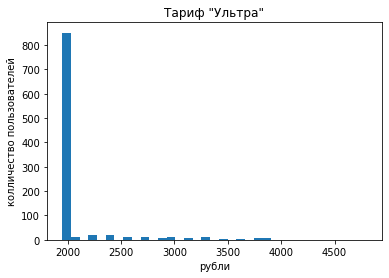

In [88]:
hist_of_spending(df_ultra, 'total_price', 35, 'рубли', 'колличество пользователей', 'Тариф "Ультра"')

Как видим, что большинство значений лежат возле абонентской платы.

##  Вывод по третьему шагу

После изучения наших данных о потраченных сообщений, звонков и интернет - трафика в месяц можно сделать вывод, что:

1. Для тарифа "Смарт" колличество звонков расчитанно оптимально, что в среднем люди укладываются в предложенный им трафик, так же как и с сообщениями, т.к. услуга не популярна, то люди всё равно в среднем укладываются в преддложенное им колличество сообщений, но вот интернет - трафика не хватает категорически. Большинство людей в среднем докупают себе доп. трафик.

2. Для тарифа "Ультра" колличество звонков расчитано более чем достаточно. В среднем люди не тратят и треть от предложенного им колличества звонков, что на мой взгляд говорит о том, что люди переплачивают, так же как и с сообщениями, но вот интернета более чем хватает. 
3. Тариф "Ультра" приносит компании больше выручки, чем тариф "Смарт".

## Шаг 4. Проверим гипотезы

Проверим альтернативную гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. 
Для определения воспользуемся t - критерием Cтьюдента, т.к. он  относится к одному из наиболее давно разработанных и широко используемых методов статистики и чаще всего применяется для проверки нулевой гипотезы о равенстве средних значений двух совокупностей. Ну и так же в наших выборках больше 50-ти значений. Итак, сформулируем наши гипотезы. 

H(0) - Нулевая гипотеза говорит нам о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.

H(1) - Альтернативная гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

 Для начала взглянем на средние показатели. 

In [89]:
df.groupby('tariff').agg({'total_price':['median','mean']})

total_price            
            median        mean
tariff                        
smart       1038.0  1294.63930
ultra       1950.0  2071.06599

Визуально видно, что медианные и средние различаются. Произведём статистические расчёты.

In [90]:
def t_test(first_df, second_df, alpha, equal_var):
    alpha = alpha
    results = st.ttest_ind(first_df, second_df, equal_var = equal_var)
    print('p-значение:', results.pvalue)
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else: 
        print("Не получилось отвергнуть нулевую гипотезу")

In [91]:
y = np.log(df_smart.total_price)
x = np.log(df_ultra.total_price)

<AxesSubplot:>

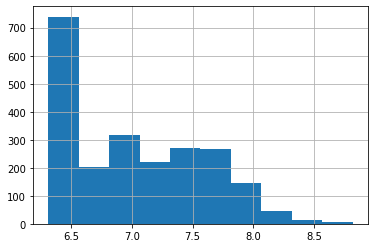

In [92]:
y.hist()

<AxesSubplot:>

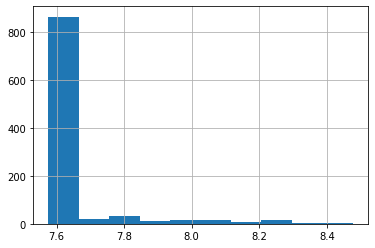

In [93]:
x.hist()

In [94]:
st.levene(df_smart.total_price, df_ultra.total_price, center ='median') #да, она по умолчанию, но сделал для себя, чтобы не забыть

LeveneResult(statistic=615.7061337306674, pvalue=1.6855369377883898e-124)

Дисперсии значительно различны. 

In [95]:
t_test(df_smart.total_price, df_ultra.total_price, 0.05, False)

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу


Принимаем альтернативную гипотезу, которая говорит нам о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Теперь узнаем различается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов.
Для этого так же сформулируем две гипотезы:

H(0) - Нулевая гипотеза говорит нам о том, средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

H(1) - Альтернативная гипотезу о том, что средняя выручка пользователей из Москвы различается от выручки пользователей из других регионов.

Теперь отберём нашу в и разделим её на два разных датафрейма.

In [96]:
df_Moscow = df.query('city == "Москва"')
df_not_Moscow = df.query('city != "Москва"')

Теперь взглянем на их средние и медианные значения.

In [97]:
df_Moscow.agg({'total_price':['median','mean']})

,total_price
median,1750.000000
mean,1550.805237


In [98]:
df_not_Moscow.agg({'total_price':['median','mean']})

,total_price
median,1587.000000
mean,1528.316942


Как видим, что средние практически одинаковы, а вот медианные значения немного расходятся. Проведём t -тест.

In [99]:
st.levene(df_not_Moscow.total_price, df_Moscow.total_price, center ='median')

LeveneResult(statistic=6.758311885867127, pvalue=0.009373921759468934)

Различия дисперсий незначительны. 

In [100]:
t_test(df_Moscow.total_price, df_not_Moscow.total_price, 0.05, True)

p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


Как видим, что у нас не получилось отвергнуть нулевую гипотезу, что говорит нам о том, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

##  Вывод по четвертому шагу

После проведения нами статистических тестов можно сделать вывод, что:

1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Тариф «Ультра» приносит выручки куда больше несмотря на большое колличество допов в тарифе «Смарт».

2. средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Так что в этот раз Москве не получилось выделиться. 

## Шаг 5. Общий вывод

1. В тарифе "Ультра" у пользователей много нерасходанных включённых услуг в отличие от тарифа "Смарт", где показатели близки к полным расходам по включённым услугам или совершают покупку допов. Средняя выручка у тарифа "Смарт" равна 1100 рублей при абонентской плате в 550 рублей, т.е. разница в 2 раза, а в тарифе "Ультра" равняется 1950 рублей при абоненсткой плате в 1950 рублей. Так же помним, что в среднем люди используют включённые услуги тарифа примерно на 1/3 от предложенного.
2. Смс как услуга вымерла. Ни в том, ни в другом тарифе она не популярна. В среднем, что в том, что в другом тарифе люди отправляют по 20-30 смс в месяц и больше всего значений лежит возле 0.
3. Другие регионы приносят такую же выручку как и Москва.

## Рекомендации

 Рассмотреть введение 3-го тарифа с возможностью регулирования потребляемых включённых услуг, т.к. не всем пользователям нужны смс, кто-то звонит много, а кто-то мало. Тоже самое с интернетом. Как видим, что в тарифе "Смарт" многих пользователям не хватает услуг, а в тарифе "Ультра" наоборот много излишек.  Таким образом можно провести оптимизацию и  сократить общий объём выделяемых ресурсов, что  позволит значителько экономить на операционных  затратах компании, но при этом, возможно, сократится валовая выручка, но, вероятно повысится чистая прибыль. В дальнейшем провести сплит-тестирование и выявить, приведет ли это к увеличению прибыли засчёт оптимизации операционных затратах компании.